In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
import os

In [3]:
# Number of hidden layers
N_layers = 3

# Number of neurons in each hidden layers
N_hidden_neurons = 500
N_input_neurons = 784
N_output_neurons = 10

# Training parameters
BETA = 1
epsilon = 0.5
n_iter1 = 100
n_iter2 = 6

alpha = np.zeros(N_layers)
a_xh1 = 0.4
a_h1h2 = 0.1
a_h2y = 0.01

MINI_BATCH_SIZE = 20
EPOCHS = 20

In [4]:
# Glorot-Bengio initialization
def glorot_bengio_init(n_in, n_out):
    std_dev = math.sqrt(2 / (n_in + n_out))
    return np.random.normal(0, std_dev, (n_in, n_out))

W_xh1 = np.array(glorot_bengio_init(N_input_neurons, N_hidden_neurons))
W_h1h2 = np.array(glorot_bengio_init(N_hidden_neurons, N_hidden_neurons))
W_h2y = np.array(glorot_bengio_init(N_hidden_neurons, N_output_neurons))

B_h1 = np.zeros(N_hidden_neurons)
B_h2 = np.zeros(N_hidden_neurons)
B_y = np.zeros(N_output_neurons)

input_layer = np.zeros(N_input_neurons)
hlayer1 = np.zeros(N_hidden_neurons)
hlayer2 = np.zeros(N_hidden_neurons)
output_layer = np.zeros(N_output_neurons)

In [5]:
def hard_sigmoid(x):
    a = np.clip(x, 0, 1)
    return a

def del_hard_sigmoid(x):
    a = hard_sigmoid(x)
    slope = int(x == a)
    return slope

def ds_dt(W_prev, layer_prev, W_next, layer_next, s_i, i, b_i, y_hat, is_op, beta):
    de_ds = 0
    dc_ds = 0
    if(is_op):
        de_ds += W_prev[i, :] * hard_sigmoid(layer_prev) + b_i
        dc_ds = beta * (y_hat - s_i)
    else:
        de_ds += W_prev[i, :] * hard_sigmoid(layer_prev) + W_next[:, i] * hard_sigmoid(layer_next) + b_i


    de_ds *= del_hard_sigmoid(s_i) 
    de_ds -= s_i

    return de_ds + dc_ds


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist  

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images and reshape to [0, 1]
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# Perform a test-train split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


ModuleNotFoundError: No module named 'tensorflow'

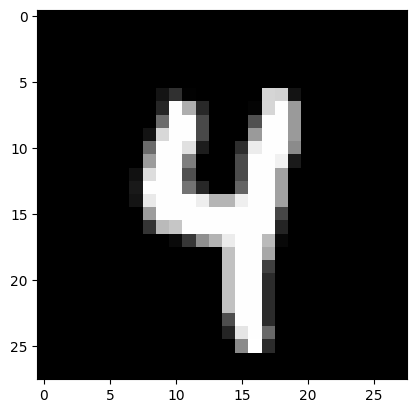

In [ ]:
import matplotlib.pyplot as plt
index = 10
img = x_train[index].reshape(28, 28)

plt.imshow(img, cmap='gray')
plt.show()


In [ ]:
# print(np.max(x_train[100]))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(len(x_train))
# print(x_train[4])

(48000, 784)
(48000,)
(10000, 784)
(10000,)
48000


In [ ]:
for i in range(len(output_layer)):
    print(i+1)
    if (i+1) == y_train[10]:
        print(i+1, y_train[10])



1
2
3
4
4 4
5
6
7
8
9
10


In [ ]:
?ds_dt

Signature:
ds_dt(
    W_prev,
    layer_prev,
    W_next,
    layer_next,
    s_i,
    i,
    b_i,
    y_hat,
    is_op,
    beta,
)
Docstring: <no docstring>
File:      c:\users\shambhavi shanker\appdata\local\temp\ipykernel_20624\2015541835.py
Type:      function

In [ ]:
x_train_batches = np.array_split(x_train, len(x_train) // MINI_BATCH_SIZE)
print(x_train_batches.shape)  

In [ ]:
dw_xh1 = np.zeros(W_xh1.shape)
dw_h1h2 = np.zeros(W_h1h2.shape)
dw_h2y = np.zeros(W_h2y.shape)

db_h1 = np.zeros(B_h1.shape)
db_h2 = np.zeros(B_h2.shape)
db_y = np.zeros(B_y.shape)

In [ ]:
for mini_batch in x_train_batches:

    dw_xh1 = np.zeros(W_xh1.shape)
    dw_h1h2 = np.zeros(W_h1h2.shape)
    dw_h2y = np.zeros(W_h2y.shape)

    db_h1 = np.zeros(B_h1.shape)
    db_h2 = np.zeros(B_h2.shape)
    db_y = np.zeros(B_y.shape)

    for idx in range(len(mini_batch)):
        # One training example

        # Forward Pass 
        input_layer = mini_batch[idx] # x is clamped

        print("Number is ", y_train[idx])
        
        for iter in range(n_iter1):
            for i in range(len(hlayer1)):
                hlayer1[i] += epsilon * ds_dt(W_xh1, input_layer, W_h1h2, hlayer2, hlayer1[i], i, B_h1[i], None, False, 0)
                hlayer1[i] = np.clip(hlayer1[i], 0, 1)
            
            for i in range(len(hlayer2)):
                hlayer2[i] += epsilon * ds_dt(W_h1h2, hlayer1, W_h2y, output_layer, hlayer2[i], i, B_h2[i], None, False, 0)
                hlayer1[i] = np.clip(hlayer1[i], 0, 1)

            for i in range(len(output_layer)):
                y_hat = 0
                if (i+1) == y_train[idx]:
                    y_hat = 1 
                output_layer[i] += epsilon * ds_dt(W_h2y, hlayer2, None, None, output_layer[i], i, B_y[i], y_hat, True, 0)
                output_layer[i] = np.clip(output_layer[i], 0, 1)

        # print("Output layer", output_layer)

        # Collect activations

        for i in range(len(hlayer2)):
            for j in range(len(output_layer)):
                dw_h2y[j, i] -= hard_sigmoid(output_layer[j]) * hard_sigmoid(hlayer2[i]) 
        
        for i in range(len(hlayer1)):
            for j in range(len(hlayer2)):
                dw_h1h2[j, i] -= hard_sigmoid(hlayer2[j]) * hard_sigmoid(hlayer1[i])

        for i in range(len(input_layer)):
            for j in range(len(hlayer1)):
                dw_xh1[j, i] -= hard_sigmoid(hlayer1[j]) * hard_sigmoid(input_layer[i])

        for i in range(len(output_layer)):
            db_y[i] -= hard_sigmoid(output_layer[i])
        
        for i in range(len(hlayer2)):
            db_h2[i] -= hard_sigmoid(hlayer2[i])

        for i in range(len(hlayer1)):
            db_h1[i] -= hard_sigmoid(hlayer1[i])

        # Backward Pass
        for iter in range(n_iter2):
            for i in range(len(output_layer)):
                y_hat = 0
                if (i+1) == y_train[idx]:
                    y_hat = 1
                output_layer[i] += epsilon * ds_dt(W_h2y, hlayer2, None, None, output_layer[i], i, B_y[i], y_hat, True, BETA)
                output_layer[i] = np.clip(output_layer[i], 0, 1)

            for i in range(len(hlayer2)):
                hlayer2[i] += epsilon * ds_dt(W_h1h2, hlayer1, W_h2y, output_layer, hlayer2[i], i, B_h2[i], None, False, BETA)
                hlayer2[i] = np.clip(hlayer2[i], 0, 1)

            for i in range(len(hlayer1)):
                hlayer1[i] += epsilon * ds_dt(W_xh1, input_layer, W_h1h2, hlayer2, hlayer1[i], i, B_h1[i], None, False, BETA)
                hlayer1[i] = np.clip(hlayer1[i], 0, 1)

        # print("Output layer", output_layer)

        # Collect activations

        for i in range(len(hlayer2)):
            for j in range(len(output_layer)):
                dw_h2y[j, i] += hard_sigmoid(output_layer[j]) * hard_sigmoid(hlayer2[i]) 
        
        for i in range(len(hlayer1)):
            for j in range(len(hlayer2)):
                dw_h1h2[j, i] += hard_sigmoid(hlayer2[j]) * hard_sigmoid(hlayer1[i])

        for i in range(len(input_layer)):
            for j in range(len(hlayer1)):
                dw_xh1[j, i] += hard_sigmoid(hlayer1[j]) * hard_sigmoid(input_layer[i])
        
        for i in range(len(output_layer)):
            db_y[i] += hard_sigmoid(output_layer[i])

        for i in range(len(hlayer2)):
            db_h2[i] += hard_sigmoid(hlayer2[i])

        for i in range(len(hlayer1)):
            db_h1[i] += hard_sigmoid(hlayer1[i])


    # Update weights only after each minibatch
    for i in range(len(hlayer2)):
        for j in range(len(output_layer)):
            W_h2y[j, i] += a_h2y * (dw_h2y[j, i] / MINI_BATCH_SIZE)
    
    for i in range(len(hlayer1)):
        for j in range(len(hlayer2)):
            W_h1h2[j, i] += a_h1h2 * (dw_h1h2[j, i] / MINI_BATCH_SIZE)

    for i in range(len(input_layer)):
        for j in range(len(hlayer1)):
            W_xh1[j, i] += a_xh1 * (dw_xh1[j, i] / MINI_BATCH_SIZE)
    
    for i in range(len(output_layer)):
        B_y[i] += a_h2y * (db_y[i] / MINI_BATCH_SIZE)

    for i in range(len(hlayer2)):
        B_h2[i] += a_h1h2 * (db_h2[i] / MINI_BATCH_SIZE)

    for i in range(len(hlayer1)):
        B_h1[i] += a_xh1 * (db_h1[i] / MINI_BATCH_SIZE)
    
    

        

        

In [ ]:
E_mean_free = T.mean(self.__energy(self.layers))
E_mean_weakly_clamped = T.mean(self.__energy(layers_weakly_clamped))
biases_dot = T.grad( (E_mean_weakly_clamped-E_mean_free) / beta, self.biases,  consider_constant=layers_weakly_clamped)
biases_new  = [b - alpha * dot for b,alpha,dot in zip(self.biases[1:],alphas,biases_dot[1:])]